# Finite Difference

## Taylor-series expansion

$
{\phi _{i-1}} = {\phi _{i}} - \Delta x\left( {\frac{{d\phi }}{{dx}}} \right)_{i}^{} + \frac{1}{2}{\left( {\Delta x} \right)^2}\left( {\frac{{{d^2}\phi }}{{d{x^2}}}} \right)_{i}^{} - ...\\
$

$
{\phi _{i+1}} = {\phi _{i}} + \Delta x\left( {\frac{{d\phi }}{{dx}}} \right)_{i}^{} + \frac{1}{2}{\left( {\Delta x} \right)^2}\left( {\frac{{{d^2}\phi }}{{d{x^2}}}} \right)_{i}^{} + ...
$

Writing for the first order derivative,

## $\displaystyle {\left( {\frac{{d\phi }}{{dx}}} \right)_i} = \frac{{{\phi _i} - {\phi _{i-1}}}}{{\Delta x}}$

## $\displaystyle {\left( {\frac{{d\phi }}{{dx}}} \right)_i} = \frac{{{\phi _{i+1}} - {\phi _i}}}{{\Delta x}}$

Subtracting the Taylor-series expansion, the first order derivative can be writen as

## $\displaystyle {\left( {\frac{{d\phi }}{{dx}}} \right)_i} = \frac{{{\phi _{i+1}} - {\phi _{i-1}}}}{{2\Delta x}}$

Adding the Taylor-series expansion, the second order derivative can be written as

## $\displaystyle {\left( {\frac{{{d^2}\phi }}{{d{x^2}}}} \right)_2} = \frac{{{\phi _3} - 2{\phi _2} + {\phi _1}}}{{{{\left( {\Delta x} \right)}^2}}} $

## For the energy equation

# $
\displaystyle \frac{{{\partial ^2}T}}{{\partial {x^2}}} + S = 0
$

# $\displaystyle \frac{{{T_{i+1}} - 2{T_{i}} + {T_{i-1}}}}{{{{\left( {\Delta x} \right)}^2}}} + S = 0 $

## Assuming a uniform grid ($\Delta x = cte$), 4 points, $T(x=0)=T_A$ and $T(x=L)=T_B$

- point $0 \to T_0 = T_A$

- point $1 \to \displaystyle - T_2 + 2 T_1 - T_0 = S {\Delta x}^2$

- point $2 \to \displaystyle - T_3 + 2 T_2 - T_1 = S {\Delta x}^20$

- point $3 \to T_3 = T_B$

writing as a linear system $A x = b$

$
\left[ {\begin{array}{*{20}{c}}
1&0&0&0\\
{ - 1}&2&{ - 1}&0\\
0&{ - 1}&2&{ - 1}\\
0&0&0&1
\end{array}} \right]\left\{ {\begin{array}{*{20}{c}}
{{T_0}}\\
{{T_1}}\\
{{T_2}}\\
{{T_3}}
\end{array}} \right\} = \left\{ {\begin{array}{*{20}{c}}
{{T_A}}\\
S {\Delta x}^2\\
S {\Delta x}^2\\
{{T_B}}
\end{array}} \right\}
$

In [1]:
import matplotlib.pyplot as plt
import numpy as np

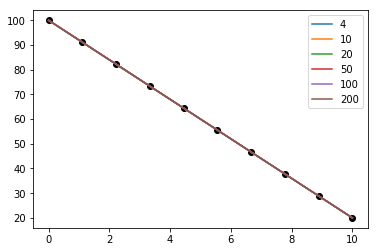

In [2]:
N = 10
L = 10.
T0 = 100.
T1 = 20.
x_array = np.linspace(0., 1, N) * L
A = (T1 - T0) / L
B = T0
analytical_solution = A * x_array + B
plt.scatter(x_array, analytical_solution, color='black')

from finite_difference import FiniteDifference
for size in [4, 10, 20, 50, 100, 200]:
    num_method = FiniteDifference(size)
    num_method.AssemblyLinearSystem()
    temp = num_method.Solve()
    plt.plot(num_method._x, temp, label=str(size))
plt.legend()
plt.show()

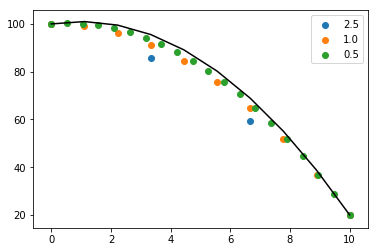

In [7]:
source_term = lambda x : 2.
A = -1.
B = (T1 - T0) / L + L
C = T0
analytical_solution = A * x_array * x_array + B * x_array + C

plt.plot(x_array, analytical_solution, color='black')

for size in [4, 10, 20]:
    num_method = FiniteDifference(size, source_term)
    num_method.AssemblyLinearSystem()
    temp = num_method.Solve()
    plt.scatter(num_method._x, temp, label=str(num_method._delta_x))
plt.legend()
plt.show()

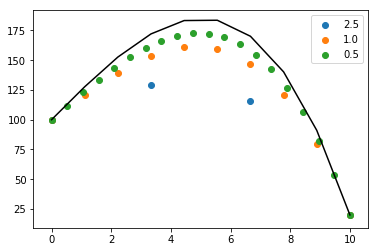

In [8]:
source_term = lambda x : 2 * x
A = - 1. / 3.
B = 0.
C = (T1 - T0) / L + L * L / 3.
D = T0
analytical_solution = A * x_array * x_array * x_array + B * x_array * x_array + C * x_array + D

plt.plot(x_array, analytical_solution, color='black')

for size in [4, 10, 20]:
    num_method = FiniteDifference(size, source_term)
    num_method.AssemblyLinearSystem()
    temp = num_method.Solve()
    plt.scatter(num_method._x, temp, label=str(num_method._delta_x))
plt.legend()
plt.show()